In [1]:
import pandas as pd
import imputation_toolkit as itk
import numpy as np

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv("./iris-flower-dataset/IRIS.csv")
df = df.drop(["species"],axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


  0%|          | 0/5 [00:00<?, ?it/s]/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
  0%|          | 0/5 [00:00<?, ?it/s]

Test mean...
finished
Test median...
finished
Test BayesianRidge...
finished
Test LinearRegression...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 80%|████████  | 4/5 [00:00<00:00, 12.89it/s]/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
100%|██████████| 5/5 [00:00<00:00, 13.93it/s]


finished
Test ExtraTreeClassifier...
finished


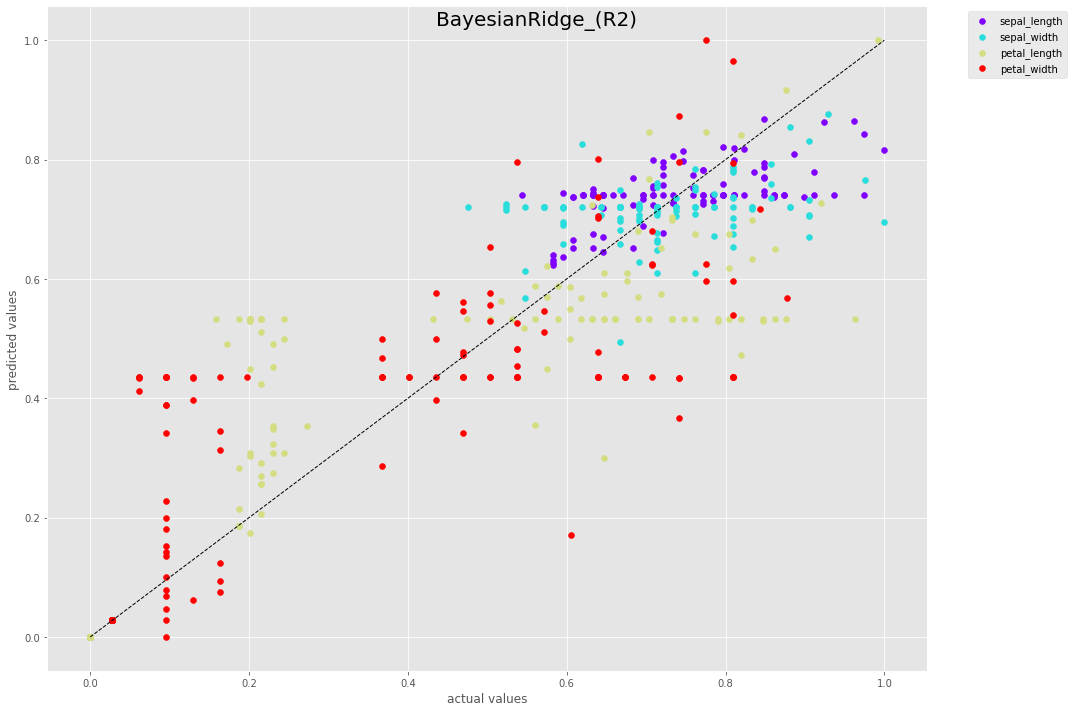

,sepal_length,sepal_width,petal_length,petal_width,mean_R2,method,duration[s]
0,0.939891,0.936658,0.557324,0.423168,0.714260,mean,0.001168
0,0.940127,0.936138,0.472467,0.422688,0.692855,median,0.001917
0,0.960691,0.940338,0.760280,0.672691,0.833500,BayesianRidge,0.057169
0,0.957327,0.941157,0.752894,0.650348,0.825431,LinearRegression,0.209416
0,0.934229,0.918023,0.591790,0.457755,0.725449,ExtraTreeClassifier,0.038371


In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer        
from sklearn.linear_model import LassoLarsCV, SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from missingpy import MissForest
from sklearn.tree import ExtraTreeRegressor
import imputation_toolkit as itk


df = pd.read_csv("./iris-flower-dataset/IRIS.csv")
df = df.drop(["species"],axis=1)


seed = 12
gain_parameters = {'batch_size': 128,
                   'hint_rate': 0.9,
                   'alpha': 70,
                   'iterations': 10000}
imputer_dict = {
    "mean": SimpleImputer(missing_values=np.nan, strategy="mean"),
    "median": SimpleImputer(missing_values=np.nan,strategy="median"),
    "BayesianRidge":IterativeImputer(estimator=BayesianRidge(),random_state=seed,initial_strategy = "mean"),
    "LinearRegression":IterativeImputer(estimator=LinearRegression(),random_state=seed,initial_strategy = "mean", max_iter=100),
    "ExtraTreeClassifier":IterativeImputer(estimator=ExtraTreeRegressor(random_state = seed),random_state=seed, initial_strategy="mean"),
    "GAIN":itk.GAINImputer(gain_parameters)
    
}


df_results = itk.test_imputation_methods(df, imputer_dict, miss_rate = 0.3, seed = seed,save_Qplot=True)
df_results

In [2]:
import utils_imputer

df = utils_imputer.parse_folder_to_df(folder = "Sabina",datatype = "xls")
df.head()

,Name des Unternehmens,GKZ Gemeinde,GKZ Stadt / Landkreis,ONACE 2008 Haupttätigkeit - Code,ONACE 2008 Nebentätigkeit - Code,Anlagevermögen\nEUR\nLetztes verf. Jahr,Anlagevermögen\nEUR\n2018,Anlagevermögen\nEUR\n2017,Anlagevermögen\nEUR\n2016,Anlagevermögen\nEUR\n2015,...,Eigenkapitalrentabilität (%)\n%\nLetztes verf. Jahr,Eigenkapitalrentabilität (%)\n%\n2018,Eigenkapitalrentabilität (%)\n%\n2017,Eigenkapitalrentabilität (%)\n%\n2015,Eigenkapitalrentabilität (%)\n%\n2016,Gewinnspanne\n%\nLetztes verf. Jahr,Gewinnspanne\n%\n2018,Gewinnspanne\n%\n2017,Gewinnspanne\n%\n2015,Gewinnspanne\n%\n2016
1,Bauernladen Krenn GmbH,NaN,NaN,G47190,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bauernstadl GmbH,Feldbach,Feldbach,G47110,I56101,1133485.0,1133485.0,999362.0,810323.0,726714.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bauernwald Rundholzbearbeitung GmbH,NaN,NaN,G46210,G47520,34251.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bauernzeitung GmbH,Innsbruck,Innsbruck,J58130,NaN,159924.0,159924.0,162396.0,156545.0,158504.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bauer & Partner Agrar GmbH,Untersiebenbrunn,Untersiebenbrunn,G46310,G46220,652812.0,652812.0,393898.0,465935.0,454545.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df["ONACE"] = df["ONACE 2008 Haupttätigkeit - Code"].apply(lambda x : str(x[:3]) if isinstance(x,str) else np.nan)

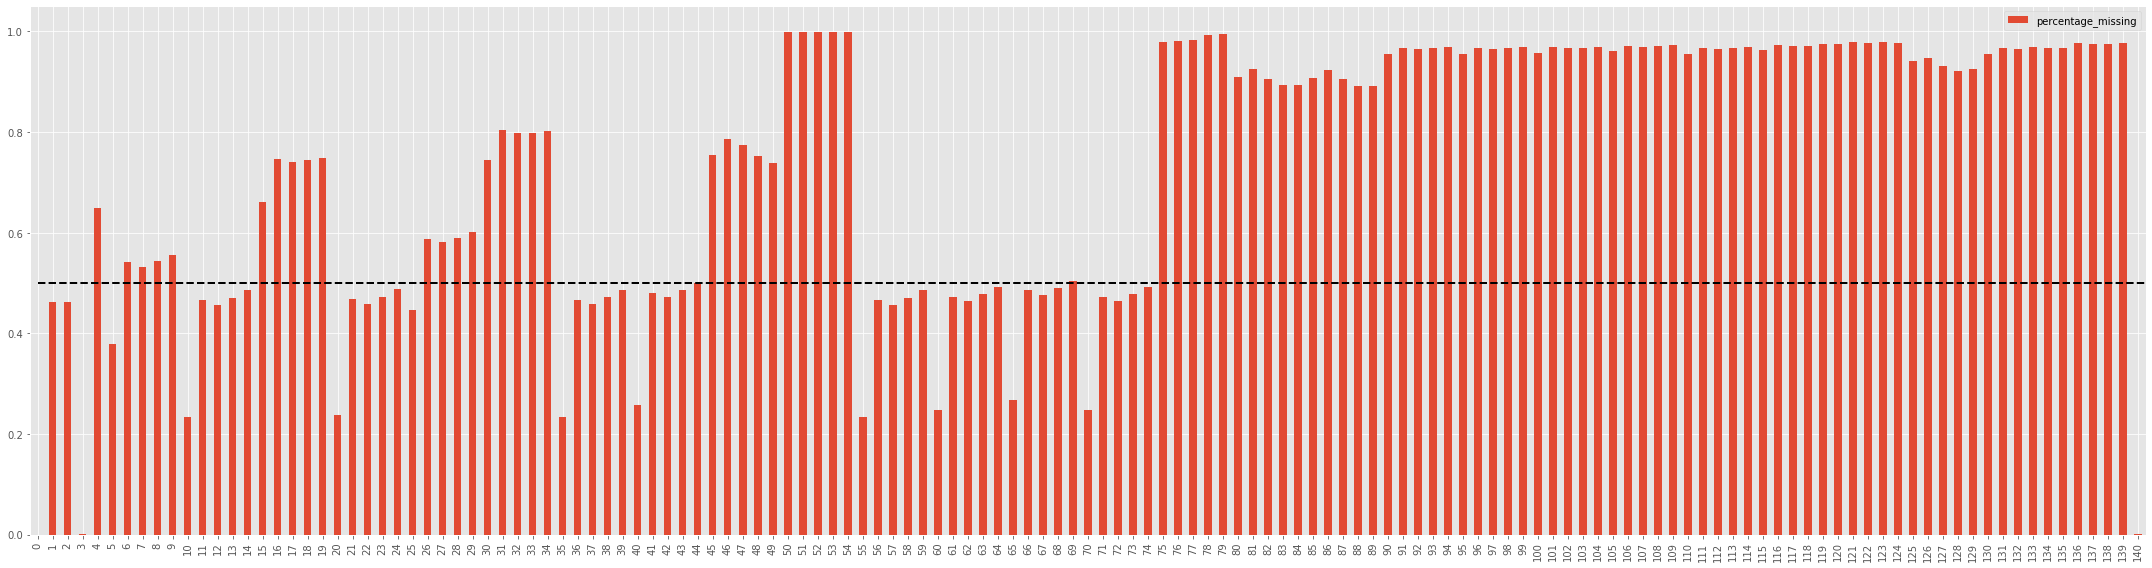

In [4]:
df_num_missing_values = itk.bar_plot_missing_values(df,save_fig=True)

In [20]:
def clean_name(name):
    name = name.replace("\n%\n"," ")
    name = name.replace("\n"," ")
    return name

In [31]:
df_num_missing_values["label"] = df_num_missing_values["label"].apply(lambda x: clean_name(x))
df_num_missing_values["percentage missing (%)"] = df_num_missing_values["percentage_missing"].apply(lambda x : round(x,2))

In [19]:
df.shape

(278498, 141)

In [34]:
df_num_missing_values.drop(columns = ["percentage_missing","percentage missing"],inplace=True)


,label,percentage missing(%)
0,Name des Unternehmens,0.00
3,ONACE 2008 Haupttätigkeit - Code,0.00
140,ONACE,0.00
55,Bilanzsumme Passiva EUR Letztes verf. Jahr,0.23
10,Bilanzsumme Aktiva EUR Letztes verf. Jahr,0.23


In [41]:
str(df_num_missing_values.reset_index().head(15).to_latex(index=False))

'\\begin{tabular}{rlr}\n\\toprule\n index &                                              label &  percentage missing(\\%) \\\\\n\\midrule\n     0 &                              Name des Unternehmens &                   0.00 \\\\\n     3 &                   ONACE 2008 Haupttätigkeit - Code &                   0.00 \\\\\n   140 &                                              ONACE &                   0.00 \\\\\n    55 &         Bilanzsumme Passiva EUR Letztes verf. Jahr &                   0.23 \\\\\n    10 &          Bilanzsumme Aktiva EUR Letztes verf. Jahr &                   0.23 \\\\\n    35 &                Eigenkapital EUR Letztes verf. Jahr &                   0.23 \\\\\n    20 &              Umlaufvermögen EUR Letztes verf. Jahr &                   0.24 \\\\\n    60 &  Langfristige Verbindlichkeiten EUR Letztes ver... &                   0.25 \\\\\n    70 &  Sonstiges Eigenkapital (inkl. Rücklagen) EUR L... &                   0.25 \\\\\n    40 &                     Kapital EUR L

In [27]:
df_num_missing_values.head(20).to_latex(index=False)

'\\begin{tabular}{lr}\n\\toprule\n                                             label &  percentage\\_missing \\\\\n\\midrule\n                             Name des Unternehmens &            0.000000 \\\\\n                  ONACE 2008 Haupttätigkeit - Code &            0.000855 \\\\\n                                             ONACE &            0.000855 \\\\\n        Bilanzsumme Passiva EUR Letztes verf. Jahr &            0.234310 \\\\\n         Bilanzsumme Aktiva EUR Letztes verf. Jahr &            0.234310 \\\\\n               Eigenkapital EUR Letztes verf. Jahr &            0.234766 \\\\\n             Umlaufvermögen EUR Letztes verf. Jahr &            0.237768 \\\\\n Langfristige Verbindlichkeiten EUR Letztes ver... &            0.246917 \\\\\n Sonstiges Eigenkapital (inkl. Rücklagen) EUR L... &            0.247646 \\\\\n                    Kapital EUR Letztes verf. Jahr &            0.257901 \\\\\n Langfristige Finanzschulden EUR Letztes verf. ... &            0.267392 \\\\\n     

In [10]:
df_num_missing_values.tail(20)

,label,percentage_missing
119,Personalaufwand\nEUR\n2015,0.974560
137,Gewinnspanne\n%\n2017,0.975375
138,Gewinnspanne\n%\n2015,0.975580
120,Gewinn pro Mitarbeiter\nEUR\nLetztes verf. Jahr,0.975788
139,Gewinnspanne\n%\n2016,0.976531
122,Gewinn pro Mitarbeiter\nEUR\n2017,0.976901
136,Gewinnspanne\n%\n2018,0.977188
124,Gewinn pro Mitarbeiter\nEUR\n2016,0.977680
121,Gewinn pro Mitarbeiter\nEUR\n2018,0.978474
75,Verbindlichkeiten ggü. Gläubigern\nEUR\nLetzte...,0.978628


In [5]:
import imputation_toolkit as itk
cols = ['Umsatzerlöse\nEUR\nLetztes verf. Jahr','Umsatzerlöse\nEUR\n2018','Umsatzerlöse\nEUR\n2017','Umsatzerlöse\nEUR\n2016']
df_res = itk.drop_cols_perc_na(df, perc_missing=0.5, cols_to_keep = cols)

In [6]:
from sklearn import preprocessing
# import swifter
from tqdm import tqdm

df_res = df_res.dropna()
onace_encoder = preprocessing.LabelEncoder()
onace_encoder.fit(df_res["ONACE"].values)

df_res["ONACE"] = onace_encoder.transform(df_res["ONACE"])
df_res = df_res._get_numeric_data()
df_res.head()

,Anlagevermögen\nEUR\nLetztes verf. Jahr,Bilanzsumme Aktiva\nEUR\nLetztes verf. Jahr,Bilanzsumme Aktiva\nEUR\n2018,Bilanzsumme Aktiva\nEUR\n2017,Bilanzsumme Aktiva\nEUR\n2016,Bilanzsumme Aktiva\nEUR\n2015,Umlaufvermögen\nEUR\nLetztes verf. Jahr,Umlaufvermögen\nEUR\n2018,Umlaufvermögen\nEUR\n2017,Umlaufvermögen\nEUR\n2016,...,Sonstiges Eigenkapital (inkl. Rücklagen)\nEUR\nLetztes verf. Jahr,Sonstiges Eigenkapital (inkl. Rücklagen)\nEUR\n2018,Sonstiges Eigenkapital (inkl. Rücklagen)\nEUR\n2017,Sonstiges Eigenkapital (inkl. Rücklagen)\nEUR\n2016,Sonstiges Eigenkapital (inkl. Rücklagen)\nEUR\n2015,Umsatzerlöse\nEUR\nLetztes verf. Jahr,Umsatzerlöse\nEUR\n2018,Umsatzerlöse\nEUR\n2017,Umsatzerlöse\nEUR\n2016,ONACE
10225,1240074.0,1267852.0,1267852.0,1279020.0,1170635.0,1207164.0,27779.0,27779.0,19410.0,173.0,...,378823.0,378823.0,383658.0,395796.0,-18259.0,18637.0,18637.0,16998.0,10437.0,54
28006,5507.0,70273.0,70273.0,58865.0,164278.0,13427.0,64766.0,64766.0,51522.0,164278.0,...,30296.0,30296.0,11472.0,13578.0,-3256.0,500000.0,500000.0,504000.0,379000.0,42
28014,4047.0,98936.0,98936.0,121500.0,82222.0,95576.0,94890.0,94890.0,114714.0,73579.0,...,-107035.0,-107035.0,-104788.0,-93098.0,-100179.0,500000.0,500000.0,300000.0,300000.0,57
28021,68393.0,673784.0,673784.0,554539.0,383296.0,249740.0,605391.0,605391.0,480479.0,311266.0,...,8300.0,8300.0,10043.0,13812.0,8416.0,500000.0,500000.0,633070.0,325458.0,59
28025,41481.0,111245.0,111245.0,100555.0,71268.0,67474.0,69764.0,69764.0,55065.0,27387.0,...,-50245.0,-50245.0,-20383.0,-6176.0,11630.0,500000.0,500000.0,500000.0,150000.0,45


 17%|█▋        | 1/6 [00:00<00:00,  5.26it/s]

Test mean...
finished
Test median...


 33%|███▎      | 2/6 [00:00<00:00,  5.13it/s]

finished
Test BayesianRidge...


 50%|█████     | 3/6 [00:02<00:02,  1.10it/s]

finished
Test LinearRegression...


 67%|██████▋   | 4/6 [00:04<00:02,  1.10s/it]

finished
Test ExtraTreeClassifier_mean...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 83%|████████▎ | 5/6 [00:25<00:06,  6.97s/it]

finished
Test ExtraTreeClassifier_median...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
100%|██████████| 6/6 [00:46<00:00,  7.68s/it]


finished


/home/humanchu/TUWien/interdis_project/Project_PhilippAusserlechner/Final_idp_project/imputation_toolkit.py:94: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


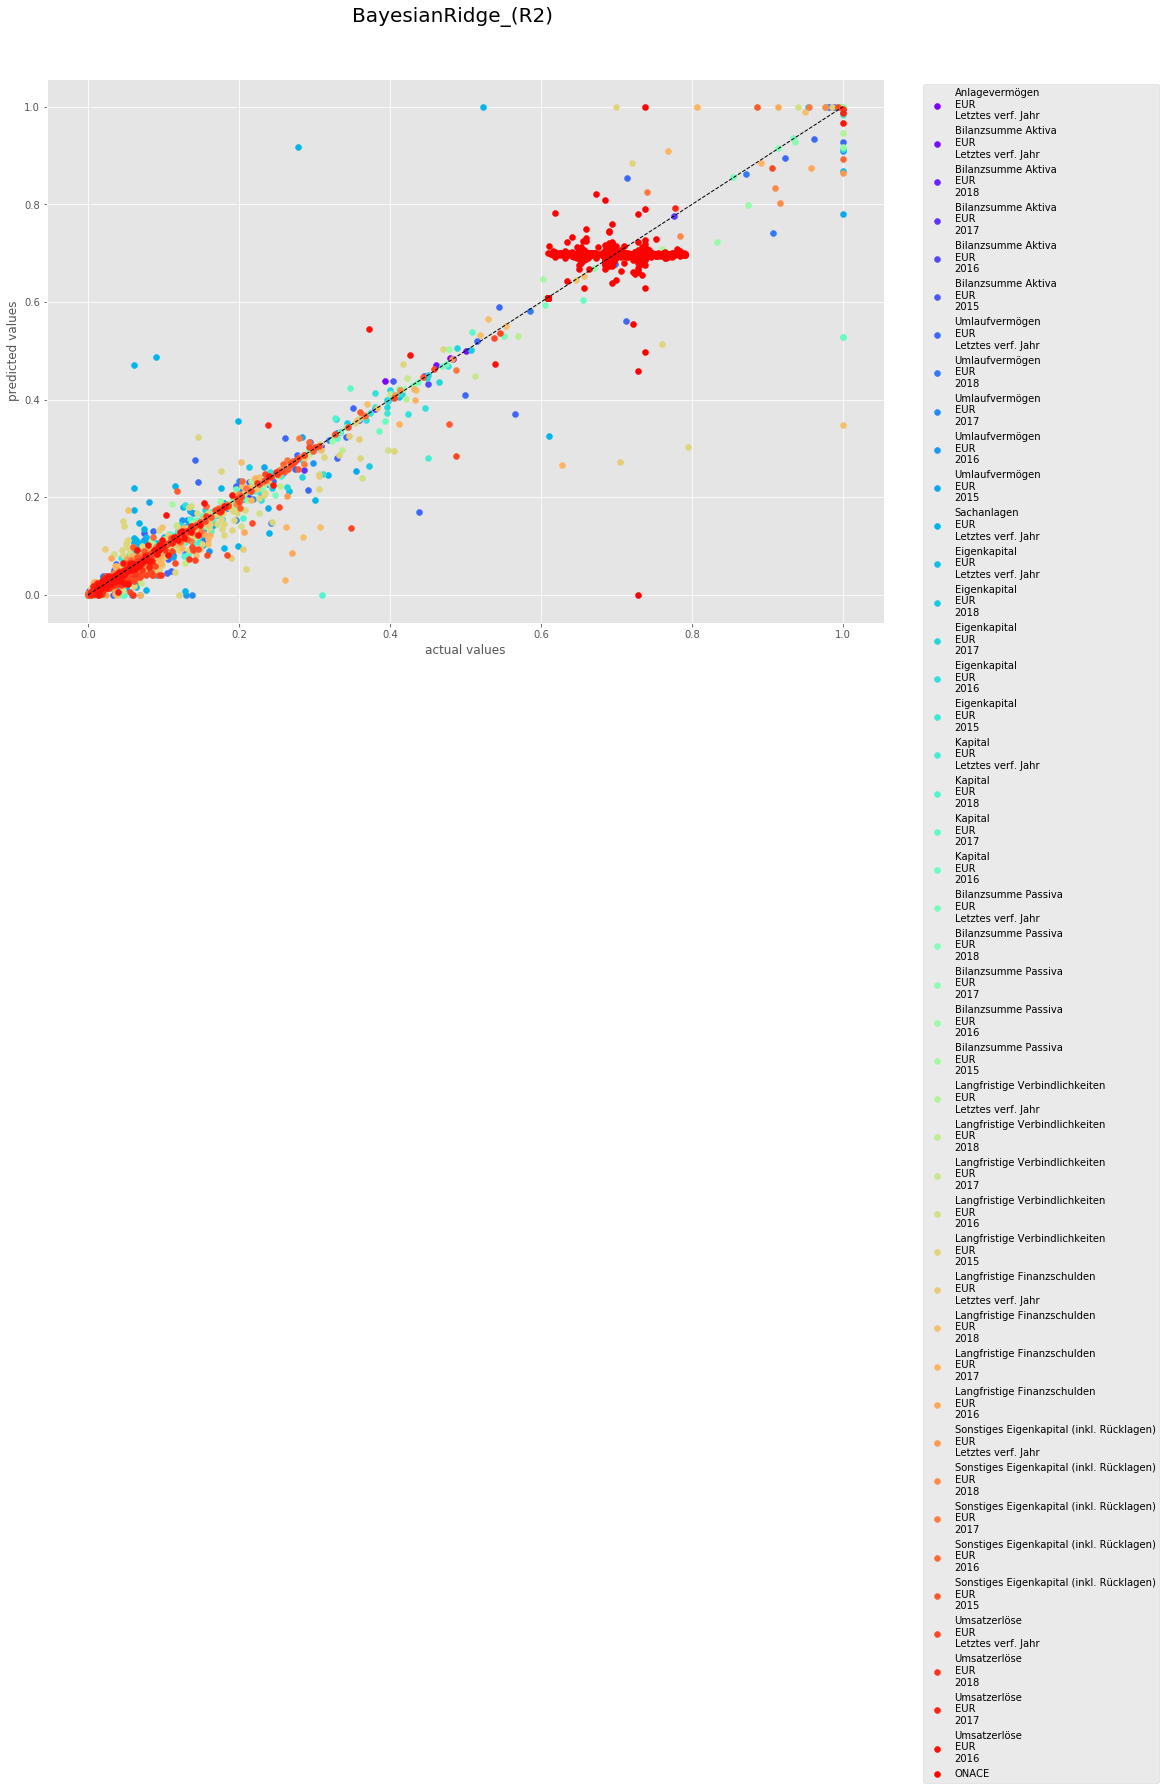

,Anlagevermögen\nEUR\nLetztes verf. Jahr,Bilanzsumme Aktiva\nEUR\nLetztes verf. Jahr,Bilanzsumme Aktiva\nEUR\n2018,Bilanzsumme Aktiva\nEUR\n2017,Bilanzsumme Aktiva\nEUR\n2016,Bilanzsumme Aktiva\nEUR\n2015,Umlaufvermögen\nEUR\nLetztes verf. Jahr,Umlaufvermögen\nEUR\n2018,Umlaufvermögen\nEUR\n2017,Umlaufvermögen\nEUR\n2016,...,Sonstiges Eigenkapital (inkl. Rücklagen)\nEUR\n2016,Sonstiges Eigenkapital (inkl. Rücklagen)\nEUR\n2015,Umsatzerlöse\nEUR\nLetztes verf. Jahr,Umsatzerlöse\nEUR\n2018,Umsatzerlöse\nEUR\n2017,Umsatzerlöse\nEUR\n2016,ONACE,mean_R2,method,duration[s]
0,0.005872,0.016624,0.019963,0.011015,0.004881,0.005091,0.043088,0.008386,0.018647,0.012301,...,0.011521,0.014681,0.055972,0.021754,0.012854,0.028181,0.847168,0.033037,mean,0.011162
0,-0.001638,-0.002444,-0.002870,-0.001735,-0.000964,-0.000898,-0.002726,-0.001406,-0.002183,-0.001167,...,-0.002093,-0.002905,-0.003019,-0.001360,-0.001071,-0.001935,0.845961,0.016707,median,0.043142
0,0.998463,0.999721,0.999968,0.999363,0.999527,0.996504,0.969749,0.991016,0.972490,0.968410,...,0.989104,0.974307,0.974210,0.989006,0.991903,0.973926,0.778732,0.935906,BayesianRidge,2.398092
0,0.998497,0.999722,0.999969,0.999377,0.999511,0.996460,0.970502,0.991374,0.970674,0.964145,...,0.988809,0.974126,0.974726,0.989165,0.991598,0.973712,0.829795,0.934376,LinearRegression,1.357035
0,0.799007,0.922163,0.957102,0.975731,0.781252,0.669122,0.867828,0.613112,0.892705,0.904299,...,0.981229,0.945716,0.975085,0.984322,0.992113,0.977490,0.699943,0.799462,ExtraTreeClassifier_mean,20.498071
0,0.795237,0.983338,0.957425,0.978746,0.832675,0.726103,0.966633,0.702107,0.868009,0.944070,...,0.974098,0.796637,0.968907,0.980853,0.991285,0.916027,0.731634,0.807302,ExtraTreeClassifier_median,20.733409


In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer        
from sklearn.linear_model import LassoLarsCV, SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from missingpy import MissForest
from impyute.imputation.cs import mice
from sklearn.tree import ExtraTreeRegressor
from fancyimpute import NuclearNormMinimization
import numpy as np
import pandas as pd


seed = 12
gain_parameters = {'batch_size': 256,
                   'hint_rate': 0.9,
                   'alpha': 70,
                   'iterations': 10000}
imputer_dict = {
    "mean": SimpleImputer(missing_values=np.nan, strategy="mean"),
    "median": SimpleImputer(missing_values=np.nan,strategy="median"),
    "BayesianRidge":IterativeImputer(estimator=BayesianRidge(),random_state=seed,initial_strategy = "median"),
    "LinearRegression":IterativeImputer(estimator=LinearRegression(),random_state=seed,initial_strategy = "median", max_iter=100),
    "ExtraTreeClassifier_mean":IterativeImputer(estimator=ExtraTreeRegressor(random_state = seed),random_state=seed, initial_strategy="mean"),
    "ExtraTreeClassifier_median":IterativeImputer(estimator=ExtraTreeRegressor(random_state = seed),random_state=seed, initial_strategy="median"),
    #"GAIN":itk.GAINImputer(gain_parameters)
    
}

df_results = itk.test_imputation_methods(df_res, imputer_dict, miss_rate = 0.2, seed = seed,save_Qplot=True)
df_results

In [18]:
df_results[["method","duration[s]","mean_R2"]].to_latex(index=False)

'\\begin{tabular}{lrr}\n\\toprule\n                     method &  duration[s] &   mean\\_R2 \\\\\n\\midrule\n                       mean &     0.011162 &  0.033037 \\\\\n                     median &     0.043142 &  0.016707 \\\\\n              BayesianRidge &     2.398092 &  0.935906 \\\\\n           LinearRegression &     1.357035 &  0.934376 \\\\\n   ExtraTreeClassifier\\_mean &    20.498071 &  0.799462 \\\\\n ExtraTreeClassifier\\_median &    20.733409 &  0.807302 \\\\\n\\bottomrule\n\\end{tabular}\n'

  0%|          | 0/12 [00:00<?, ?it/s]

Test Rf_10_auto_1_2...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
  8%|▊         | 1/12 [00:05<01:00,  5.54s/it]

finished
Test Rf_10_auto_1_10...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 17%|█▋        | 2/12 [00:10<00:54,  5.49s/it]

finished
Test Rf_10_auto_10_2...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 25%|██▌       | 3/12 [00:16<00:49,  5.45s/it]

finished
Test Rf_10_auto_10_10...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 33%|███▎      | 4/12 [00:21<00:43,  5.41s/it]

finished
Test Rf_100_auto_1_2...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 42%|████▏     | 5/12 [00:43<01:13, 10.43s/it]

finished
Test Rf_100_auto_1_10...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 50%|█████     | 6/12 [00:57<01:08, 11.43s/it]

finished
Test Rf_100_auto_10_2...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 58%|█████▊    | 7/12 [01:07<00:54, 10.95s/it]

finished
Test Rf_100_auto_10_10...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 67%|██████▋   | 8/12 [01:17<00:42, 10.60s/it]

finished
Test Rf_None_auto_1_2...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 75%|███████▌  | 9/12 [01:38<00:41, 13.94s/it]

finished
Test Rf_None_auto_1_10...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 83%|████████▎ | 10/12 [01:52<00:27, 13.82s/it]

finished
Test Rf_None_auto_10_2...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 92%|█████████▏| 11/12 [02:02<00:12, 12.58s/it]

finished
Test Rf_None_auto_10_10...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
100%|██████████| 12/12 [02:11<00:00, 10.97s/it]


finished


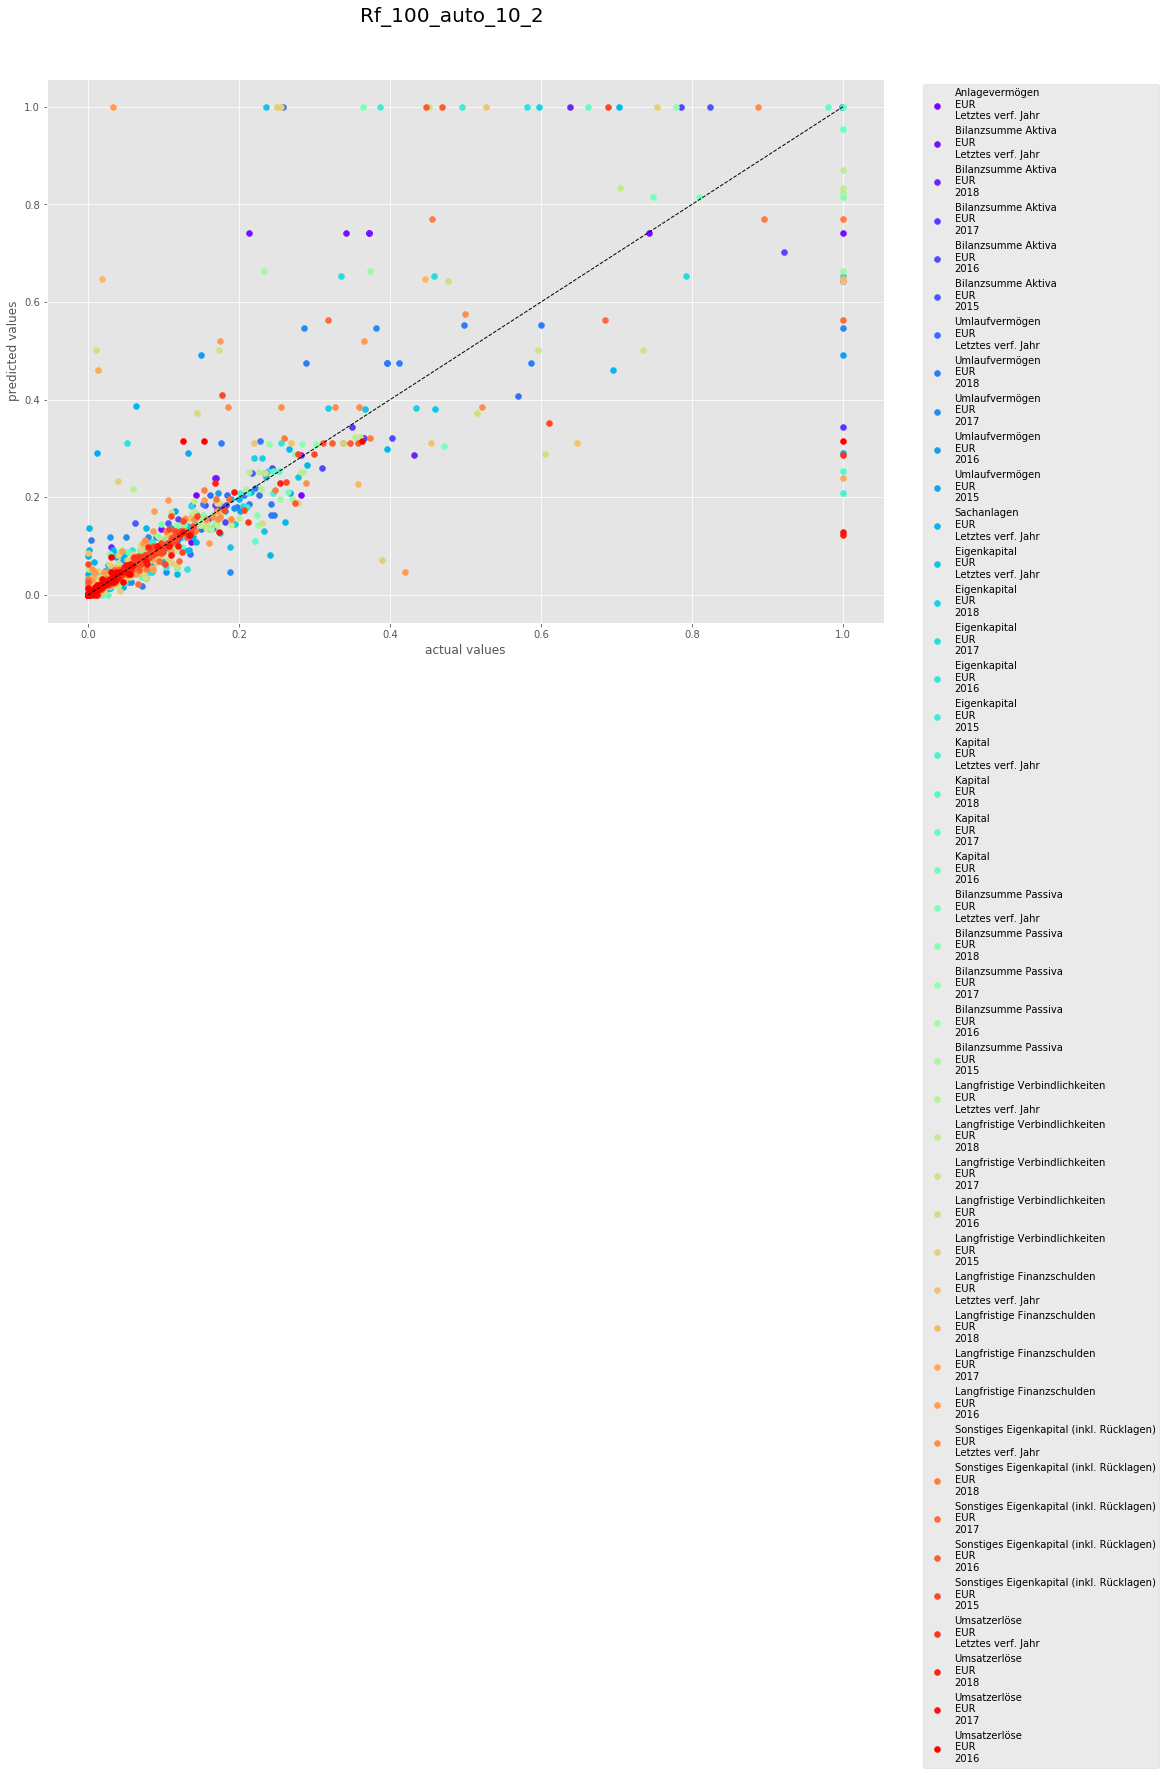

,Anlagevermögen\nEUR\nLetztes verf. Jahr,Bilanzsumme Aktiva\nEUR\nLetztes verf. Jahr,Bilanzsumme Aktiva\nEUR\n2018,Bilanzsumme Aktiva\nEUR\n2017,Bilanzsumme Aktiva\nEUR\n2016,Bilanzsumme Aktiva\nEUR\n2015,Umlaufvermögen\nEUR\nLetztes verf. Jahr,Umlaufvermögen\nEUR\n2018,Umlaufvermögen\nEUR\n2017,Umlaufvermögen\nEUR\n2016,...,Sonstiges Eigenkapital (inkl. Rücklagen)\nEUR\n2017,Sonstiges Eigenkapital (inkl. Rücklagen)\nEUR\n2016,Sonstiges Eigenkapital (inkl. Rücklagen)\nEUR\n2015,Umsatzerlöse\nEUR\nLetztes verf. Jahr,Umsatzerlöse\nEUR\n2018,Umsatzerlöse\nEUR\n2017,Umsatzerlöse\nEUR\n2016,mse,method,duration[s]
0,1.225526e+16,5.533303e+14,1.672963e+15,2.900591e+16,2.171371e+14,2.180981e+15,4.543397e+13,3.188342e+13,3.299782e+15,2.242785e+15,...,6.644226e+14,3.237702e+13,1.514476e+13,1.012721e+16,2.604736e+15,1.110062e+15,1.097336e+16,1.416239e+10,Rf_10_auto_1_2,5.268482
0,3.006328e+15,8.193506e+15,2.287427e+15,3.699041e+16,7.525412e+13,1.404621e+15,1.179305e+15,1.279113e+13,2.279544e+15,2.284648e+15,...,8.722346e+14,3.532902e+13,7.983437e+12,1.253574e+16,1.364319e+15,9.101539e+14,8.881226e+15,6.841716e+09,Rf_10_auto_1_10,5.112617
0,4.242124e+15,1.896715e+16,4.191696e+15,4.729883e+16,1.947288e+14,9.112638e+14,1.182193e+15,5.093956e+13,2.273706e+15,2.300449e+15,...,1.454183e+15,1.280654e+15,5.452085e+13,2.831948e+16,2.035367e+16,1.705487e+16,2.485143e+16,2.320828e+10,Rf_10_auto_10_2,5.066262
0,4.242124e+15,1.896715e+16,4.191696e+15,4.729883e+16,1.947288e+14,9.112638e+14,1.182193e+15,5.093956e+13,2.273706e+15,2.300449e+15,...,1.454183e+15,1.280654e+15,5.452085e+13,2.831948e+16,2.035367e+16,1.705487e+16,2.485143e+16,2.320828e+10,Rf_10_auto_10_10,5.039758
0,2.007517e+15,1.230610e+15,1.188010e+15,2.554243e+16,3.110699e+14,8.507664e+14,4.252420e+13,6.174548e+12,2.787772e+15,9.190245e+14,...,3.559668e+14,7.901218e+13,1.087330e+13,1.037427e+16,3.152218e+14,1.105831e+14,7.879680e+15,6.115370e+07,Rf_100_auto_1_2,21.878029
0,3.085236e+15,8.196742e+15,1.485160e+15,3.681782e+16,3.998992e+13,1.429619e+15,1.198173e+15,1.866802e+13,2.281789e+15,3.832169e+15,...,8.789848e+14,6.279887e+13,4.321972e+12,2.232721e+16,1.561861e+14,5.864196e+13,2.842896e+16,1.459012e+08,Rf_100_auto_1_10,13.499026
0,4.162751e+15,2.139960e+16,4.221073e+15,4.731223e+16,1.838241e+14,9.581777e+14,1.187006e+15,2.743071e+13,1.845927e+15,2.326242e+15,...,1.549298e+15,1.293465e+15,9.704147e+13,3.105553e+16,2.033313e+16,1.589372e+16,2.346782e+16,5.932113e+07,Rf_100_auto_10_2,9.554556
0,4.162751e+15,2.139960e+16,4.221073e+15,4.731223e+16,1.838241e+14,9.581777e+14,1.187006e+15,2.743071e+13,1.845927e+15,2.326242e+15,...,1.549298e+15,1.293465e+15,9.704147e+13,3.105553e+16,2.033313e+16,1.589372e+16,2.346782e+16,5.932113e+07,Rf_100_auto_10_10,9.513197
0,2.007517e+15,1.230610e+15,1.188010e+15,2.554243e+16,3.110699e+14,8.507664e+14,4.252420e+13,6.174548e+12,2.787772e+15,9.190245e+14,...,3.559668e+14,7.901218e+13,1.087330e+13,1.037427e+16,3.152218e+14,1.105831e+14,7.879680e+15,6.115370e+07,Rf_None_auto_1_2,21.453887
0,3.085236e+15,8.196742e+15,1.485160e+15,3.681782e+16,3.998992e+13,1.429619e+15,1.198173e+15,1.866802e+13,2.281789e+15,3.832169e+15,...,8.789848e+14,6.279887e+13,4.321972e+12,2.232721e+16,1.561861e+14,5.864196e+13,2.842896e+16,1.459012e+08,Rf_None_auto_1_10,13.278843


In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer        
from sklearn.linear_model import LassoLarsCV, SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from missingpy import MissForest
from impyute.imputation.cs import mice
from sklearn.tree import ExtraTreeRegressor
from fancyimpute import NuclearNormMinimization
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd


seed = 12

df_grit_search = df_res.iloc[:1000,]


rf_param_grit = {'max_depth': [10, 100, None],
                 'max_features': ['auto'],
                 'min_samples_leaf': [1, 10],
                 'min_samples_split': [2, 10]}


rf_params = [[md,mf,msl,mss] for md in rf_param_grit["max_depth"] 
                                  for mf in rf_param_grit["max_features"]
                                  for msl in rf_param_grit["min_samples_leaf"]
                                  for mss in rf_param_grit["min_samples_split"]
                                  ] 

imputer_dict = {}
for params in rf_params:
    imputer_dict[f"ET_{params[0]}_{params[1]}_{params[2]}_{params[3]}"]=IterativeImputer(estimator=ExtraTreeRegressor(random_state = seed,
                                                                                                                         max_depth=params[0],
                                                                                                                         max_features=params[1],
                                                                                                                         min_samples_leaf=params[2],
                                                                                                                         min_samples_split=params[3],
                                                                                                                        ),
                                                                                                                 random_state=seed,
                                                                                                                 initial_strategy="median")
    

df_results = itk.test_imputation_methods(df_res, imputer_dict, miss_rate = 0.1, seed = seed)
df_results

In [3]:
import imputation_toolkit as itk
cols = ['Umsatzerlöse\nEUR\nLetztes verf. Jahr','Umsatzerlöse\nEUR\n2018','Umsatzerlöse\nEUR\n2017','Umsatzerlöse\nEUR\n2016']
df_res = itk.drop_cols_perc_na(df, perc_missing=0.3, cols_to_keep = cols)

In [4]:
df_res = df_res.dropna()
df_res = df_res._get_numeric_data()
df_res.shape

(10106, 12)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer        
from sklearn.linear_model import LassoLarsCV, SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from missingpy import MissForest
from impyute.imputation.cs import mice
from sklearn.tree import ExtraTreeRegressor
from fancyimpute import NuclearNormMinimization
import numpy as np
import pandas as pd


seed = 12
gain_parameters = {'batch_size': 256,
                   'hint_rate': 0.9,
                   'alpha': 70,
                   'iterations': 100000}
imputer_dict = {
    "mean": SimpleImputer(missing_values=np.nan, strategy="mean"),
    "median": SimpleImputer(missing_values=np.nan,strategy="median"),
    "BayesianRidge":IterativeImputer(estimator=BayesianRidge(),random_state=seed,initial_strategy = "median"),
    "LinearRegression":IterativeImputer(estimator=LinearRegression(),random_state=seed,initial_strategy = "median", max_iter=100),
    "ExtraTreeClassifier_median":IterativeImputer(estimator=ExtraTreeRegressor(random_state = seed),random_state=seed, initial_strategy="median"),
    "ExtraTreeClassifier_tuned": IterativeImputer(estimator=ExtraTreeRegressor(random_state = seed,
                                                                               max_depth = 100,
                                                                               max_features="auto",
                                                                               min_samples_leaf=10,
                                                                               min_samples_split=2),random_state=seed, initial_strategy="median")
#     "KNN": KNNImputer(n_neighbors=85),
#     "GAIN":itk.GAINImputer(gain_parameters)
    
}

df_results = itk.test_imputation_methods(df_res, imputer_dict, miss_rate = 0.1, seed = seed)
df_results

/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
  0%|          | 0/8 [00:00<?, ?it/s]

Test mean...
finished
Test median...
finished
Test BayesianRidge...


 38%|███▊      | 3/8 [00:00<00:00,  5.62it/s]

finished
Test LinearRegression...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 50%|█████     | 4/8 [00:02<00:03,  1.22it/s]

finished
Test ExtraTreeClassifier_median...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 62%|██████▎   | 5/8 [00:05<00:03,  1.24s/it]

finished
Test ExtraTreeClassifier_tuned...


/home/humanchu/anaconda3/envs/gain/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
 75%|███████▌  | 6/8 [00:05<00:02,  1.14s/it]

finished
Test KNN...


 88%|████████▊ | 7/8 [00:09<00:01,  1.87s/it]

finished
Test GAIN...
